# Midterm Project : M.A.F.I.A. in the morning(3)
* * *

## 3. 메딕은 시민을 살립니다.
* 가장 단순한 게임에 메딕이 들어옵니다
    * 메딕은 매일 밤 한 사람을 골라서 살려줍니다
        * 마피아의 총에 맞은 사람을 지목하면 살리고
        * 아닌 사람을 지목하면 아무 일도 일어나지 않겠죠
* 이 경우 확률은 어떻게 변화할까요? 어떤 패턴이 있을까요?
    * 메딕도 시민입니다. 마피아가 밤에 죽일 수도 있습니다.

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

### Code

- 기존 코드에서의 변경 내용을 표시

In [12]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    medic=list.count("medic")
    participant = mafia+citizen
    return mafia, citizen, medic, participant

def modefinder(numbers): 
    c = Counter(numbers) 
    mode = c.most_common(1) 
    return mode[0][0]

In [13]:
def medic_Save(participants, kill):
    if participants.count("medic") == 0:
        return False
    save=random.randrange(0, len(participants))
    if save==kill:
        return True
    return False

In [14]:
def day_Vote(participants):
    vote_list=list()
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(participants.index("citizen"), len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

In [15]:
def night_Kill(participants):
    vote_list=list()
    for i in range(0, participants.index("citizen")):
        if participants[i]=="mafia":
            vote=random.randrange(participants.index("citizen"), len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    if medic_Save(participants, max_vote)==False:
        del participants[max_vote]
    return participants

In [16]:
def in_Game(participants):
    turn = "morning"
    mafia, citizen, medic, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
        mafia, citizen, medic, people = people_Count(participants)
    #print(participants)
    if mafia == 0:
        return True
    else:
        return False

In [17]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    medic=participants.count("medic")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        job_Init(medic, "medic", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

In [39]:
def Mafia_Game_withMedic_Stats(num_mafia, num_citizen, num_medic):
    mafia = num_mafia
    citizen = num_citizen
    medic = num_medic
    citizen_win_list=list()
    for i in range (0, 100):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

Mafia_Game_withMedic_Stats(2,0,7)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [18]:
def Mafia_Game_changewithMedic(num_mafia, num_citizen, num_medic):
    mafia = num_mafia
    citizen = num_citizen
    medic = num_medic
    participants = mafia+citizen+medic
    citizen_win_list=list()
    while mafia*2 < participants:
        mafia += 1
        citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

In [19]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_changewithMedic(0, 97, 3)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,68.0
2,46.0
3,36.0
4,18.0
5,3.0
6,3.0
7,2.0
8,1.0
9,0.0
10,0.0


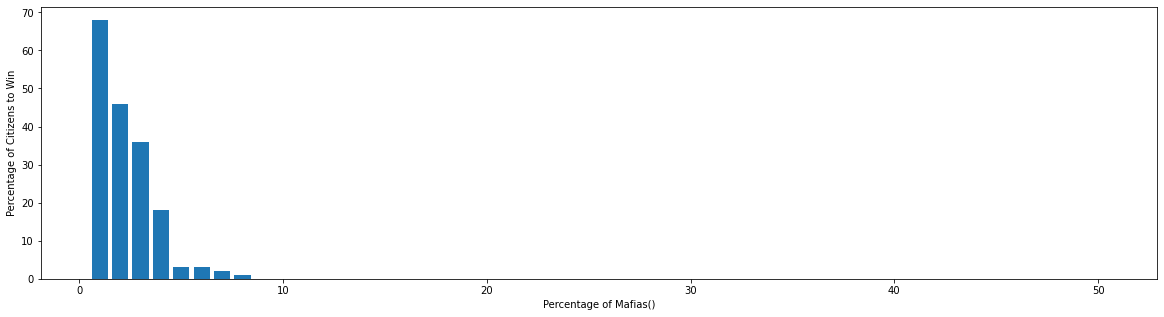

In [20]:
plt.figure(figsize=(20,5))
plt.bar(index, Game)
plt.xlabel(f"Percentage of Mafias()")
plt.ylabel("Percentage of Citizens to Win")
plt.show()
plt.close()